In [1]:
from pandas_datareader import data as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)


In [2]:
end=dt.datetime.now()
start=dt.datetime(end.year - 20,end.month,end.day)


In [3]:
start

datetime.datetime(2001, 3, 26, 0, 0)

In [4]:
df=reader.get_data_yahoo('JNJ',start,end)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-03-26,43.750000,42.509998,43.750000,42.689999,17008200.0,25.263931
2001-03-27,41.650002,40.250000,41.500000,41.625000,66045400.0,24.633657
2001-03-28,43.169998,41.750000,41.750000,43.139999,34455000.0,25.530218
2001-03-29,44.299999,43.049999,43.139999,44.189999,19979200.0,26.151623
2001-03-30,44.615002,43.610001,44.500000,43.735001,15620600.0,25.882366
...,...,...,...,...,...,...
2021-03-19,161.500000,159.470001,160.690002,160.039993,14884500.0,160.039993
2021-03-22,160.649994,158.000000,158.309998,160.500000,7544100.0,160.500000
2021-03-23,161.199997,158.880005,160.210007,160.350006,7178300.0,160.350006


In [6]:
from fbprophet import Prophet

In [7]:
model=Prophet()

In [8]:
model

In [9]:
df=df.reset_index()


In [10]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2001-03-26,43.750000,42.509998,43.750000,42.689999,17008200.0,25.263931
1,2001-03-27,41.650002,40.250000,41.500000,41.625000,66045400.0,24.633657
2,2001-03-28,43.169998,41.750000,41.750000,43.139999,34455000.0,25.530218
3,2001-03-29,44.299999,43.049999,43.139999,44.189999,19979200.0,26.151623
4,2001-03-30,44.615002,43.610001,44.500000,43.735001,15620600.0,25.882366
...,...,...,...,...,...,...,...
5027,2021-03-19,161.500000,159.470001,160.690002,160.039993,14884500.0,160.039993
5028,2021-03-22,160.649994,158.000000,158.309998,160.500000,7544100.0,160.500000
5029,2021-03-23,161.199997,158.880005,160.210007,160.350006,7178300.0,160.350006
5030,2021-03-24,162.479996,159.820007,160.100006,161.910004,6370100.0,161.910004


In [11]:
df[['ds','y']]=df[['Date','Adj Close']]

In [12]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2001-03-26,43.750000,42.509998,43.750000,42.689999,17008200.0,25.263931,2001-03-26,25.263931
1,2001-03-27,41.650002,40.250000,41.500000,41.625000,66045400.0,24.633657,2001-03-27,24.633657
2,2001-03-28,43.169998,41.750000,41.750000,43.139999,34455000.0,25.530218,2001-03-28,25.530218
3,2001-03-29,44.299999,43.049999,43.139999,44.189999,19979200.0,26.151623,2001-03-29,26.151623
4,2001-03-30,44.615002,43.610001,44.500000,43.735001,15620600.0,25.882366,2001-03-30,25.882366
...,...,...,...,...,...,...,...,...,...
5027,2021-03-19,161.500000,159.470001,160.690002,160.039993,14884500.0,160.039993,2021-03-19,160.039993
5028,2021-03-22,160.649994,158.000000,158.309998,160.500000,7544100.0,160.500000,2021-03-22,160.500000
5029,2021-03-23,161.199997,158.880005,160.210007,160.350006,7178300.0,160.350006,2021-03-23,160.350006
5030,2021-03-24,162.479996,159.820007,160.100006,161.910004,6370100.0,161.910004,2021-03-24,161.910004


In [13]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
daily_seasonality=True

In [14]:
future=model.make_future_dataframe(periods=365)


In [15]:
forecast = model.predict(future)

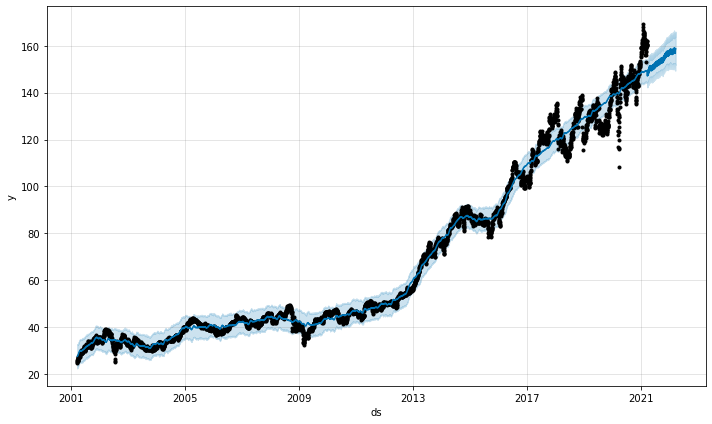

In [16]:
model.plot(forecast)
plt.show()

In [17]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5367,2022-02-24,158.319809,152.400552,166.081556,154.149095,162.769386,0.420459,0.420459,0.420459,0.614556,0.614556,0.614556,-0.194097,-0.194097,-0.194097,0.0,0.0,0.0,158.740268
5368,2022-02-25,158.346034,152.212253,165.602478,154.128685,162.811428,0.371987,0.371987,0.371987,0.556569,0.556569,0.556569,-0.184582,-0.184582,-0.184582,0.0,0.0,0.0,158.718021
5369,2022-02-26,158.372259,150.384876,163.488014,154.148968,162.858505,-1.624569,-1.624569,-1.624569,-1.447867,-1.447867,-1.447867,-0.176702,-0.176702,-0.176702,0.0,0.0,0.0,156.747691
5370,2022-02-27,158.398485,150.380137,163.463663,154.171865,162.912575,-1.618757,-1.618757,-1.618757,-1.447867,-1.447867,-1.447867,-0.170890,-0.170890,-0.170890,0.0,0.0,0.0,156.779728
5371,2022-02-28,158.424710,151.901883,165.367814,154.193193,162.966646,0.340278,0.340278,0.340278,0.507830,0.507830,0.507830,-0.167552,-0.167552,-0.167552,0.0,0.0,0.0,158.764988
5372,2022-03-01,158.450935,152.459661,165.745484,154.187679,163.019187,0.442514,0.442514,0.442514,0.609571,0.609571,0.609571,-0.167057,-0.167057,-0.167057,0.0,0.0,0.0,158.893449
5373,2022-03-02,158.477160,152.417696,165.684806,154.182166,163.071532,0.437472,0.437472,0.437472,0.607207,0.607207,0.607207,-0.169735,-0.169735,-0.169735,0.0,0.0,0.0,158.914633
5374,2022-03-03,158.503386,152.405382,165.651247,154.187706,163.123877,0.438690,0.438690,0.438690,0.614556,0.614556,0.614556,-0.175866,-0.175866,-0.175866,0.0,0.0,0.0,158.942075
5375,2022-03-04,158.529611,152.643334,166.555283,154.191193,163.176221,0.370891,0.370891,0.370891,0.556569,0.556569,0.556569,-0.185678,-0.185678,-0.185678,0.0,0.0,0.0,158.900502
5376,2022-03-05,158.555836,149.859718,163.940722,154.181720,163.224223,-1.647207,-1.647207,-1.647207,-1.447867,-1.447867,-1.447867,-0.199340,-0.199340,-0.199340,0.0,0.0,0.0,156.908629
